Dependancy imports

In [1]:
from bs4 import BeautifulSoup
import glob
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import requests
import seaborn as sns
import sklearn.covariance as skcov
from typing import List, Tuple

MIN_VOLUME = 100_000
benchmark = '^GSPC' # add S&P 500 as benchmark

Gather all tickers

In [2]:
wiki_page = requests.get('https://en.wikipedia.org/wiki/List_of_American_exchange-traded_funds').text
soup = BeautifulSoup(wiki_page, 'lxml')

list_items = soup.select('li:contains("|")')
tickers = []

for list_item in list_items:
    li_text: str = list_item.text
    start_index: int = li_text.find('|')
    end_index: int = li_text.find(')',start_index)
    tickers.append(li_text[start_index +1:end_index].strip())

print(tickers)

['DIA', 'RSP', 'IOO', 'IVV', 'SPY', 'SHE', 'VOO', 'IWM', 'OEF', 'QQQ', 'CVY', 'RPG', 'RPV', 'IWB', 'IWF', 'IWD', 'IVV', 'IVW', 'IVE', 'PKW', 'PRF', 'SPLV', 'SCHX', 'SCHG', 'SCHV', 'SCHD', 'FNDX', 'SDY', 'VOO', 'VOOG', 'VOOV', 'VV', 'VUG', 'VTV', 'MGC', 'MGK', 'MGV', 'VONE', 'VONG', 'VONV', 'VIG', 'VYM', 'DTN', 'DLN', 'MDY', 'DVY', 'IWR', 'IWP', 'IWS', 'IJH', 'IJK', 'IJJ', 'PDP', 'SCHM', 'IVOO', 'IVOG', 'IVOV', 'VO', 'VOT', 'VOE', 'VXF', 'DON', 'IWC', 'IWM', 'IWO', 'IWN', 'IJR', 'IJT', 'IJS', 'SCHA', 'FNDA', 'VIOO', 'VIOG', 'VIOV', 'VB', 'VBK', 'VBR', 'VTWO', 'VTWG', 'VTWV', 'EEB', 'ECON', 'IDV', 'ACWX', 'BKF', 'EFA', 'EFG', 'EFV', 'SCZ', 'EEM', 'PID', 'SCHC', 'SCHE', 'SCHF', 'FNDF', 'FNDC', 'FNDE', 'DWX', 'VEA', 'VWO', 'VXUS', 'VEU', 'VSS', 'DEM', 'DGS', 'AAXJ', 'EZU', 'EPP', 'IEV', 'ILF', 'FEZ', 'VGK', 'VPL', 'HEDJ', 'DFE', 'AND', 'GXF', 'EWA', 'EWC', 'EWG', 'EIS', 'EWI', 'EWJ', 'EWY', 'EWD', 'EWL', 'EWP', 'EWU', 'DXJ', 'NORW', 'INDF', 'EWZ', 'FXI', 'EWH', 'EWW', 'EPHE', 'RSX', 'EWS',

In [3]:
leveraged_page = requests.get('https://etfdb.com/etfs/leveraged/equity/').text
soup = BeautifulSoup(leveraged_page, 'lxml')

list_items = soup.select('td[data-th="Symbol"] > a')
for list_item in list_items:
    tickers.append(list_item.text)
    
print(tickers)

['DIA', 'RSP', 'IOO', 'IVV', 'SPY', 'SHE', 'VOO', 'IWM', 'OEF', 'QQQ', 'CVY', 'RPG', 'RPV', 'IWB', 'IWF', 'IWD', 'IVV', 'IVW', 'IVE', 'PKW', 'PRF', 'SPLV', 'SCHX', 'SCHG', 'SCHV', 'SCHD', 'FNDX', 'SDY', 'VOO', 'VOOG', 'VOOV', 'VV', 'VUG', 'VTV', 'MGC', 'MGK', 'MGV', 'VONE', 'VONG', 'VONV', 'VIG', 'VYM', 'DTN', 'DLN', 'MDY', 'DVY', 'IWR', 'IWP', 'IWS', 'IJH', 'IJK', 'IJJ', 'PDP', 'SCHM', 'IVOO', 'IVOG', 'IVOV', 'VO', 'VOT', 'VOE', 'VXF', 'DON', 'IWC', 'IWM', 'IWO', 'IWN', 'IJR', 'IJT', 'IJS', 'SCHA', 'FNDA', 'VIOO', 'VIOG', 'VIOV', 'VB', 'VBK', 'VBR', 'VTWO', 'VTWG', 'VTWV', 'EEB', 'ECON', 'IDV', 'ACWX', 'BKF', 'EFA', 'EFG', 'EFV', 'SCZ', 'EEM', 'PID', 'SCHC', 'SCHE', 'SCHF', 'FNDF', 'FNDC', 'FNDE', 'DWX', 'VEA', 'VWO', 'VXUS', 'VEU', 'VSS', 'DEM', 'DGS', 'AAXJ', 'EZU', 'EPP', 'IEV', 'ILF', 'FEZ', 'VGK', 'VPL', 'HEDJ', 'DFE', 'AND', 'GXF', 'EWA', 'EWC', 'EWG', 'EIS', 'EWI', 'EWJ', 'EWY', 'EWD', 'EWL', 'EWP', 'EWU', 'DXJ', 'NORW', 'INDF', 'EWZ', 'FXI', 'EWH', 'EWW', 'EPHE', 'RSX', 'EWS',

In [4]:
tickers.append(benchmark) # append benchmark

Fetch ticker info from Yahoo

In [5]:
import yfinance as yf

data: pd.DataFrame = yf.download(tickers=" ".join(tickers), period="5y", interval="1d", group_by='ticker')
print(data)

[*********************100%***********************]  440 of 440 completed

23 Failed downloads:
- BGU: No data found for this date range, symbol may be delisted
- AND: No data found, symbol may be delisted
- IFAS: No data found for this date range, symbol may be delisted
- ONEF: No data found for this date range, symbol may be delisted
- IELG: No data found for this date range, symbol may be delisted
- ACCU: No data found for this date range, symbol may be delisted
- HDGI: No data found for this date range, symbol may be delisted
- GLDE: No data found for this date range, symbol may be delisted
- BABZ: No data found for this date range, symbol may be delisted
- DBIZ: No data found for this date range, symbol may be delisted
- FTGS: No data found, symbol may be delisted
- YPRO: No data found, symbol may be delisted
- WDTI: No data found, symbol may be delisted
- RPX: No data found, symbol may be delisted
- CRDT: No data found for this date range, symbol may be delisted
- RWG: No data fou

Delete existing file cache

In [6]:
files = glob.glob(os.path.join("data", '*'))

for file in files:
    os.remove(file)

Save output to file to prevent further network requests.

In [7]:
found_tickers: List[str] = data.columns.get_level_values(0).unique().to_list()

for found_ticker in found_tickers:
    data[found_ticker].to_csv(os.path.join("data", found_ticker + '.csv'))


Read files back from directory.

In [28]:
csv_paths = glob.glob(os.path.join("data", '*.csv'))
prices_df = None
vol_df = None

for csv_path in csv_paths:
    (ticker_id, extension) = csv_path.split(".", 1)
    df = pd.read_csv(csv_path, index_col='Date', usecols=['Date', 'Adj Close', 'Volume'], header=0, parse_dates=True)

    if prices_df is not None:
        prices_df = prices_df.join(df[['Adj Close']])
        vol_df = vol_df.join(df[['Volume']])
    else:
        prices_df = df[['Adj Close']]
        vol_df = df[['Volume']]
        
    prices_df = prices_df.rename(columns={'Adj Close': os.path.split(ticker_id)[1]})
    vol_df = vol_df.rename(columns={'Volume': os.path.split(ticker_id)[1]})

prices_df = prices_df.sort_values(by='Date', axis=0)
vol_df = vol_df.sort_values(by='Date', axis=0)

print(prices_df)
print(vol_df)

                 AADR       AAXJ  ACCU       ACWX         AGG        ALD  \
Date                                                                       
2016-04-28  37.487904  49.920837   NaN  35.586933   97.960892  45.139999   
2016-04-29  37.264015  49.399494   NaN  35.481754   97.952057  44.959999   
2016-05-02  37.789680  49.454376   NaN  35.709648   97.885666  45.330002   
2016-05-03  37.195869  48.320229   NaN  34.990894   98.062637  44.880001   
2016-05-04  36.816216  47.716564   NaN  34.587700   98.106903  44.740002   
...               ...        ...   ...        ...         ...        ...   
2021-04-21  64.529999  93.599998   NaN  56.740002  114.739998        NaN   
2021-04-22  64.690002  93.260002   NaN  56.540001  114.769997        NaN   
2021-04-23  65.790001  94.660004   NaN  57.160000  114.750000        NaN   
2021-04-26  66.480003  94.779999   NaN  57.240002  114.650002        NaN   
2021-04-27  66.536003  94.849998   NaN  57.119999  114.370003        NaN   

           

Calculate the average volume and only bother running further analysis on securities with sufficient liquidity.

In [29]:
avg_vol = vol_df.mean()
liquid_tickers = avg_vol.index[avg_vol >= MIN_VOLUME]
prices_df = prices_df[liquid_tickers]

In [30]:
most_recent_prices_df = prices_df.iloc[-1]
tickers_to_drop = most_recent_prices_df[most_recent_prices_df.isnull()].index.values
tickers_to_drop

array(['CIU', 'CSJ', 'EU', 'IPF', 'IRY'], dtype=object)

Calculate price returns

In [31]:
returns_df = prices_df.pct_change()
returns_df = returns_df.drop(columns=tickers_to_drop)

found_tickers = returns_df.columns
returns_df

,AAXJ,ACWX,AGG,AMLP,ARKF,ARKG,ARKK,ARKQ,ARKW,ARKX,...,XLE,XLF,XLI,XLK,XLP,XLU,XLV,XLY,XOP,^GSPC
Date,,,,,,,,,,,,,,,,,,,,,
2016-04-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-04-29,-0.010443,-0.002956,-0.000090,0.014963,NaN,-0.031077,-0.036489,-0.023037,-0.014727,NaN,...,-0.001627,-0.005546,-0.005842,-0.008706,-0.002099,0.006025,-0.015656,0.005076,-0.003624,-0.005063
2016-05-02,0.001111,0.006423,-0.000678,-0.007371,NaN,0.012600,0.006356,0.002115,0.010222,NaN,...,-0.001037,0.009009,0.005164,0.007358,0.011472,0.008055,0.005731,0.014015,-0.007554,0.007810
2016-05-03,-0.022933,-0.020128,0.001808,-0.024753,NaN,-0.014706,-0.014737,-0.019204,-0.009641,NaN,...,-0.023580,-0.012755,-0.008149,-0.009189,-0.001891,-0.000819,-0.003134,-0.009214,-0.046800,-0.008677
2016-05-04,-0.012493,-0.011523,0.000451,0.007614,NaN,-0.039897,-0.027244,-0.025282,-0.015422,NaN,...,-0.014429,-0.007752,-0.012324,-0.003092,0.003030,0.011688,-0.009575,-0.004524,-0.023366,-0.005937
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-21,0.004723,0.009788,0.000960,0.015311,0.012731,0.026202,0.023697,0.026911,0.017195,0.013848,...,0.012747,0.013857,0.013653,0.010082,0.005006,-0.008417,0.011805,0.013325,0.019865,0.009306
2021-04-22,-0.003632,-0.003525,0.000261,-0.010053,-0.003429,0.003915,-0.003366,-0.005718,-0.011713,-0.000976,...,-0.011747,-0.011105,-0.005051,-0.011738,-0.007400,-0.007148,-0.004456,-0.011071,-0.008348,-0.009211
2021-04-23,0.015012,0.010966,-0.000174,0.021580,0.018158,0.012604,0.018862,0.015455,0.023569,0.010742,...,0.009128,0.018716,0.010950,0.014936,-0.002581,-0.001350,0.006592,0.010456,0.013896,0.010929


Calucate expected return using geomean from price return

In [32]:
from scipy.stats import gmean

exp_return_df = pd.DataFrame()
for found_ticker in found_tickers:
    returns_sr = returns_df[pd.notnull(returns_df[found_ticker])][found_ticker]
    if exp_return_df.empty:
        exp_return_df = pd.DataFrame(data={
            'ticker': found_ticker,
            'exp_return': [0] if returns_sr.empty else [gmean(returns_sr + 1) - 1]
        })
    else:
        exp_return_df = pd.concat([
            exp_return_df,
            pd.DataFrame(data={
                'ticker': found_ticker,
                'exp_return': [0] if returns_sr.empty else [gmean(returns_sr + 1) - 1]
            })
        ])

exp_return_df = exp_return_df.set_index('ticker').T
exp_return_df

ticker,AAXJ,ACWX,AGG,AMLP,ARKF,ARKG,ARKK,ARKQ,ARKW,ARKX,...,XLE,XLF,XLI,XLK,XLP,XLU,XLV,XLY,XOP,^GSPC
exp_return,0.000511,0.000377,0.000123,-0.000149,0.001771,0.001355,0.001534,0.001222,0.001715,0.001383,...,-0.00009,0.000582,0.00055,0.001022,0.000324,0.00038,0.000504,0.000702,-0.000416,0.000558


Calculate expected covariance using price return

In [33]:
lw = skcov.LedoitWolf() # use Ledoit and Wolf Shrinkage covariance
lw.fit(returns_df.fillna(0))
covar_df = pd.DataFrame(lw.covariance_).set_index(pd.Index(returns_df.columns))
covar_df.columns = returns_df.columns
#covar_df = returns_df.cov()
covar_df

,AAXJ,ACWX,AGG,AMLP,ARKF,ARKG,ARKK,ARKQ,ARKW,ARKX,...,XLE,XLF,XLI,XLK,XLP,XLU,XLV,XLY,XOP,^GSPC
AAXJ,0.000172,0.000131,2.802554e-06,0.000123,0.000110,0.000162,0.000178,0.000160,0.000171,8.425988e-07,...,0.000152,0.000128,1.219607e-04,0.000147,0.000068,0.000068,9.518359e-05,0.000121,0.000182,0.000118
ACWX,0.000131,0.000140,3.376005e-06,0.000141,0.000102,0.000151,0.000162,0.000147,0.000151,9.117767e-07,...,0.000167,0.000143,1.316555e-04,0.000138,0.000075,0.000079,9.705349e-05,0.000121,0.000198,0.000121
AGG,0.000003,0.000003,1.773245e-05,0.000008,0.000007,0.000005,0.000007,0.000004,0.000007,6.818589e-08,...,0.000003,-0.000003,1.838692e-07,0.000002,0.000002,0.000005,-3.830016e-07,0.000003,-0.000002,0.000001
AMLP,0.000123,0.000141,8.494182e-06,0.000446,0.000112,0.000178,0.000186,0.000169,0.000163,7.936682e-07,...,0.000333,0.000199,1.725243e-04,0.000140,0.000074,0.000074,1.044008e-04,0.000138,0.000453,0.000141
ARKF,0.000110,0.000102,7.155593e-06,0.000112,0.000190,0.000183,0.000206,0.000161,0.000198,2.186202e-06,...,0.000121,0.000110,1.029611e-04,0.000145,0.000062,0.000075,8.374500e-05,0.000118,0.000141,0.000112
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
XLU,0.000068,0.000079,4.844271e-06,0.000074,0.000075,0.000078,0.000082,0.000072,0.000076,-9.924409e-08,...,0.000109,0.000105,1.022030e-04,0.000099,0.000098,0.000180,8.889483e-05,0.000086,0.000090,0.000098
XLV,0.000095,0.000097,-3.830016e-07,0.000104,0.000084,0.000160,0.000147,0.000123,0.000130,2.078239e-07,...,0.000130,0.000127,1.191825e-04,0.000133,0.000083,0.000089,1.381960e-04,0.000108,0.000145,0.000118
XLY,0.000121,0.000121,3.383229e-06,0.000138,0.000118,0.000179,0.000198,0.000172,0.000188,1.070700e-06,...,0.000161,0.000152,1.441648e-04,0.000163,0.000085,0.000086,1.076676e-04,0.000166,0.000193,0.000138
XOP,0.000182,0.000198,-2.216219e-06,0.000453,0.000141,0.000238,0.000247,0.000239,0.000215,1.375744e-06,...,0.000517,0.000290,2.520134e-04,0.000202,0.000102,0.000090,1.445099e-04,0.000193,0.000812,0.000202


<AxesSubplot:>

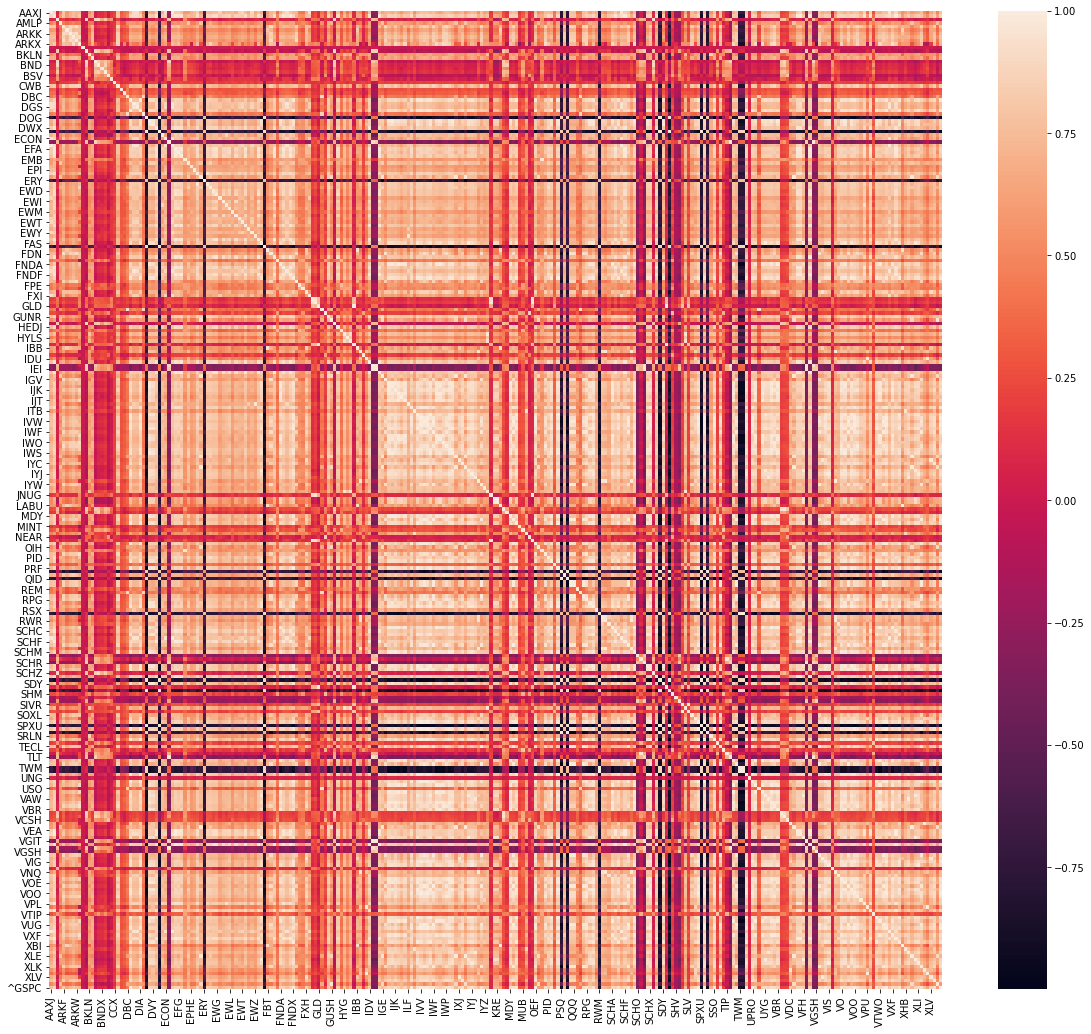

In [34]:
plt.figure(figsize=(20, 18))

sns.heatmap(returns_df.corr())

Reorder expected return to line up with covar matrix

In [35]:
exp_return_df = exp_return_df[covar_df.columns]
exp_return_df

ticker,AAXJ,ACWX,AGG,AMLP,ARKF,ARKG,ARKK,ARKQ,ARKW,ARKX,...,XLE,XLF,XLI,XLK,XLP,XLU,XLV,XLY,XOP,^GSPC
exp_return,0.000511,0.000377,0.000123,-0.000149,0.001771,0.001355,0.001534,0.001222,0.001715,0.001383,...,-0.00009,0.000582,0.00055,0.001022,0.000324,0.00038,0.000504,0.000702,-0.000416,0.000558


<AxesSubplot:xlabel='ticker'>

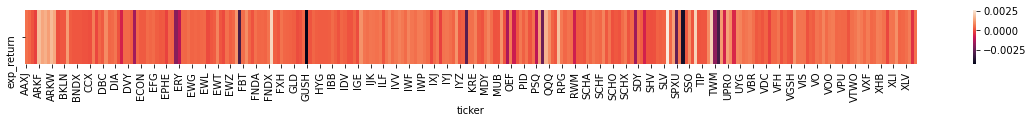

In [36]:
plt.figure(figsize=(20, 1))

sns.heatmap(exp_return_df)

Optimization of portfolio

$$ \frac{\mu - r_{f}}{\sigma} $$

In [37]:
alpha_df = exp_return_df.T - exp_return_df[benchmark] # subtract market return
alpha_df = alpha_df[alpha_df['exp_return'] >= 0] # filter to only positive alpha
alpha_sr = alpha_df['exp_return'].to_numpy()

covar_df = covar_df[covar_df.index.isin(alpha_df.index)][alpha_df.index] # filter to only positive alpha
covar = covar_df.round(8).to_numpy()
alpha_df

,exp_return
ticker,
ARKF,0.001213
ARKG,0.000797
ARKK,0.000976
ARKQ,0.000664
ARKW,0.001157
...,...
XHB,0.000125
XLF,0.000024
XLK,0.000464


In [47]:
from scipy.optimize import minimize

def information_ratio(weights: np.ndarray, covar_matrix: np.ndarray, alpha_returns: np.ndarray) -> float:
    # we are minimizing the negative to get a maximum
    objective = float(-weights.dot(alpha_returns) / (np.sqrt(weights.dot(covar_matrix).dot(weights.T)) - covar_df.loc[benchmark, benchmark]))
    return objective

weights = np.ones_like(covar_df.columns)
constraints = ({'type': 'eq', 'fun': lambda weights: np.sum(weights) - 1})
# bounds are in the form of (lower, upper)
bounds = [(0, None,) for i in range(len(weights))] # bounded by zero (no shorting)
portfolio = minimize(information_ratio, weights, args=(covar, alpha_sr), bounds=bounds, constraints=constraints)
print(portfolio)
pd.concat([alpha_df.reset_index()['ticker'], pd.Series(portfolio.x)], axis=1)

     fun: -0.2721877274435228
     jac: array([0.01048124, 0.13378455, 0.12301334, 0.12615411, 0.04890995,
       0.01333363, 0.16227052, 0.16878928, 0.27475436, 0.18780211,
       0.09681731, 0.44474593, 0.16613889, 0.35164769, 0.15107796,
       0.24537545, 0.2437894 , 0.23553259, 0.24968553, 0.19347518,
       0.20524431, 0.19613713, 0.18188026, 0.19854403, 0.1773131 ,
       0.25004559, 0.25069919, 0.22891509, 0.23374543, 0.18084778,
       0.20441638, 0.13808712, 0.82561655, 0.17860544, 0.58792349,
       0.19165783, 0.25865392, 0.2172653 , 0.17863252, 0.20295722,
       0.14231612, 0.18341435, 0.2526256 , 0.26242631, 0.15336252,
       0.18259984, 0.24204215, 0.19759567, 0.42492251, 0.4231043 ,
       0.1927249 , 0.29214746, 0.34448464, 0.66429747, 0.30398668,
       0.40232879, 0.42805106, 0.68772344, 0.42763644, 0.35223466,
       0.24392803, 0.23565099, 0.21724819, 0.13272658, 0.17255161,
       0.23348978, 0.17379184, 0.19607086, 0.22958408, 0.25166862,
       0.18325724, 0.1

,ticker,0
0,ARKF,6.866705e-02
1,ARKG,0.000000e+00
2,ARKK,0.000000e+00
3,ARKQ,0.000000e+00
4,ARKW,0.000000e+00
...,...,...
74,XHB,0.000000e+00
75,XLF,5.970602e-14
76,XLK,0.000000e+00
77,XLY,0.000000e+00


In [39]:
import cvxpy as cv
# math basis for reformation to a standard convex quadratic program here: 
# https://people.stat.sc.edu/sshen/events/backtesting/reference/maximizing%20the%20sharpe%20ratio.pdf
# https://coral.ise.lehigh.edu/~ted/files/ie447/lectures/Lecture9.pdf

mu = alpha_df.to_numpy().T # asset expected return (we use alpha in this case)
w = cv.Variable((len(alpha_df), 1)) # optimization weights
k = cv.Variable((1, 1))
ret = mu @ w # port return = assets return * asset weight
rf0 = 0 # this could be substituted for benchmark return instead of calculating alpha beforehand
sigma = covar_df.to_numpy()

g = cv.Variable(nonneg=True) # non-negative scalar

try:
    G = np.linalg.cholesky(sigma) # cholesky decomposition of covariance matrix
except:
    G = sqrtm(sigma)
    
risk = g ** 2
devconstraints = [cv.SOC(g, G.T @ w)]
constraints = [
    cv.sum(w) == 1 * k,
    k >= 0,
    mu @ w - rf0 * k == 1,
    w <= 1 * k, w * 1000 >= 0 # these 2 constraints = no shorting
]
constraints += devconstraints
objective = cv.Minimize(risk * 1000)
prob = cv.Problem(objective, constraints)
prob.solve(solver='ECOS') # options are ['ECOS', 'SCS', 'OSQP', 'CVXOPT']
weights = np.array(w.value / k.value, ndmin=2).T
weights = np.abs(weights) / np.sum(np.abs(weights)) # use absolute value since no shorting
weights_df = pd.concat([alpha_df.reset_index()['ticker'], pd.Series(weights[0])], axis=1).rename(columns={0: 'weight'})
weights_df

,ticker,weight
0,ARKF,6.983949e-02
1,ARKG,1.312072e-09
2,ARKK,1.449327e-09
3,ARKQ,1.382988e-09
4,ARKW,4.045361e-09
...,...,...
74,XHB,7.340747e-10
75,XLF,8.142331e-10
76,XLK,1.179882e-09
77,XLY,8.873873e-10


In [40]:
# send weights to clipboard
pd.Series(portfolio.x).to_clipboard()

In [41]:
# send expected alphas to clipboard
alpha_df.to_clipboard()

In [42]:
# send covars to clipboard
covar_df.to_clipboard()

In [43]:
exp_yearly_alpha =  (1 + alpha_sr.dot(pd.Series(portfolio.x).to_numpy())) ** 250 - 1 # assume 250 trading days in year
exp_yearly_alpha

0.2371323430487564

In [44]:
from math import sqrt
exp_yearly_risk = sqrt(pd.Series(portfolio.x).to_numpy().dot(covar_df.to_numpy()).dot(pd.Series(portfolio.x).to_numpy().T)) * sqrt(250)
exp_yearly_risk

0.05185126971718322

In [48]:
exp_yearly_alpha / (exp_yearly_risk - covar_df.loc[benchmark, benchmark])

4.586667270277425